In [1]:
from sage.graphs.connectivity import connected_components
from sage.graphs.connectivity import connected_components_number

def mreza(m,n,a,b): #m x n mreža, a št. izbrisanih vozlov, b št.izrbirsanih povezav
    mreza = graphs.Grid2dGraph(m,n)
    if a > mreza.order():
        print("Za ukaz je na voljo premalo vozlov.")
    else:
        i = 0
        while i < a:
            mreza.delete_vertex(mreza.random_vertex())
            i = i+1
        i = 0
    if b > mreza.size():
        print("Za ukaz je na voljo premalo povezav.")
    else:
        while i < b:
            mreza.delete_edge(mreza.random_edge())
            i = i+1
    return mreza

def najkrajsa_razdalja(G, st_centrov):
    K = st_centrov
    razdalje = G.distance_all_pairs()

    p = MixedIntegerLinearProgram(maximization=False)
    x = p.new_variable(binary=True) #x_uv = 1 če mesto u spada k skladišču v (mestu v s skladiščem)
    y = p.new_variable(binary=True) # y_v = 1 če je v mestu v skladišče

    p.set_objective(p['R']) # največja razdalja je spremenljivka

    for u in G:
        p.add_constraint(sum(x[u, v] for v in G) == 1) #za vsako mesto u bo veljalo, da spada pod neko območje mesta v s skladiščem

    p.add_constraint(sum(y[v] for v in G) == K) #vsota skladišč je enaka K

    for u in G:
        for v in G:
            p.add_constraint(x[u, v] <= y[v]) #ne sme se zgoditi, da mesto u pade v območje mesta v, v mestu v pa sploh ni skladišča

    for u in G:
        for v in G:
            if v in razdalje[u]:
                p.add_constraint(razdalje[u][v] * x[u, v] <= p['R']) # če sta vozlišči v isti povezani komponenti, potem omejimo največjo razdaljo                                                                        do skladišča
            else:
                p.add_constraint(x[u, v] == 0) # sicer mesto u ne more pripadati skladišču v
    max_razdalja = p.solve()
    skladisca = [k for k, v in p.get_values(y).items() if v == 1]
    print(skladisca)
    return max_razdalja


#G = mreza(5,3,3,2)
#slika=G.show()
#najkrajsa_razdalja(G,5)

#print(connected_components(G)) #večdelni graf zapiše po ločenih delih
#print(connected_components_number(G)) #št. delov

In [2]:
#kako se optimalna vrednost spreminja glede na k
def opt_vrednost_k(k):
    G = mreza(5,5,7,2)
    seznam_vrednosti = []
    stevilo_komponent = connected_components_number(G)
    for i in range(stevilo_komponent,k+1): ## težave pri določanju najmanjšega i???
        razdalja = round(najkrajsa_razdalja(G, i)) #round za zaokrževanje števil
        seznam_vrednosti.append((razdalja))
    return seznam_vrednosti

opt_vrednost_k(10)


[(1, 1), (4, 1)]


[(0, 2), (2, 2), (4, 1)]


[(0, 2), (1, 0), (2, 3), (4, 0)]
[(0, 1), (0, 3), (2, 1), (3, 4), (4, 0)]


[(0, 1), (0, 3), (2, 0), (2, 3), (3, 3), (4, 0)]


[(0, 0), (0, 3), (2, 0), (2, 1), (2, 4), (4, 0), (4, 3)]
[(0, 0), (0, 2), (1, 3), (2, 0), (2, 1), (2, 4), (4, 0), (4, 3)]


[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (2, 0), (2, 3), (3, 3), (4, 0)]


[(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 0), (2, 1), (2, 3), (3, 3), (4, 0)]


[5.0, 3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [3]:
#kako se oprimalna vrednost spreminja glede na št. izbrisanih vozlov a
def opt_vrednost_vozli(a):
    seznam_vrednosti = []
    for i in range(0,a+1): 
        #print(i)
        vozli = mreza(5,4,i,3)
        #G.show()
        razdalja = round(najkrajsa_razdalja(vozli, 5)) #round za zaokrževanje števil 
        seznam_vrednosti.append((razdalja))
    return seznam_vrednosti

opt_vrednost_vozli(4)

[(0, 2), (1, 0), (2, 2), (2, 3), (3, 0)]


[(0, 2), (1, 0), (2, 3), (3, 1), (4, 1)]


[(0, 1), (1, 3), (2, 0), (3, 2), (3, 3)]
[(0, 1), (1, 0), (1, 3), (2, 3), (4, 1)]


[(0, 1), (1, 1), (1, 3), (3, 0), (3, 2)]


[2.0, 2.0, 2.0, 2.0, 2.0]

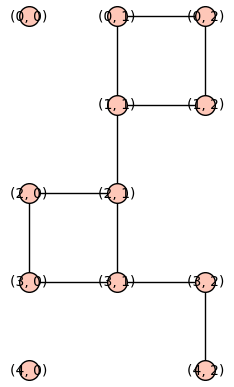

[(0, 0), (2, 1), (4, 0)]
[(0, 0), (1, 1), (3, 1), (4, 0)]
[(0, 0), (0, 2), (2, 1), (3, 2), (4, 0)]


[0.026084423065185547, 0.04758906364440918, 0.07548260688781738]

In [4]:
import time

#čas izvajanja v odvisnosti od k
def cas_izvajanja_k(k):
    F = mreza(5,3,3,2)
    slika=F.show()
    seznam_casov = []
    stevilo_komponent = connected_components_number(F)
    for i in range(stevilo_komponent,k+1):
        zacetni = time.time()
        najkrajsa_razdalja(F,i)
        koncni = time.time() - zacetni
        seznam_casov.append((koncni))
    return seznam_casov

cas_izvajanja_k(5)